### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data preparation
Due to complicated data scraping procedure (website was rendered in Javascript), data is located in many different .csv files. This section is used to clean and preparare data for further analysis. Main objectives:
* Load all data from .csv to pandas DataFrames,
* Check for NAN values (drop rows with NAN values if needed),
* Check for duplicates,
* Concactinate everything into single large DataFrame,
* Create a new DataFrame where each row would represent unique bet.

## 1.1 Basketball game outcomes
File `basketball_games.csv` contains information about both NBA and Euroleague games for 2013-2018 seasons and games from curent NBA 2018/2019 season up to **DATE**. Each column provides information about:
* League name,
* Season match was played on,
* Away team final score,
* Home team final score,
* Who won (1.0- Home team won, 0.0- Away Team won),
* Did game require overtime (OT)? (1.0- Yes, 0.0- No),
* Highest avaibable coeficient for Home win prior to match start,
* Highest avaibable coeficient for Away win prior to match start,
* Link to detailed information about the match. URL link is unique for each match.

In [2]:
df_scores = pd.read_csv("data/basketball_games.csv", index_col=0)
df_scores.head()

,League,Season,Home_score,Away_score,Win,OT,Home_p,Away_p,URL
0,NBA,2018/2019,113.0,104.0,1.0,0.0,2.32,1.74,https://www.oddsportal.com/basketball/usa/nba/...
1,NBA,2018/2019,117.0,116.0,1.0,0.0,1.40,3.40,https://www.oddsportal.com/basketball/usa/nba/...
2,NBA,2018/2019,135.0,129.0,1.0,0.0,1.24,5.03,https://www.oddsportal.com/basketball/usa/nba/...
3,NBA,2018/2019,111.0,96.0,1.0,0.0,1.16,7.20,https://www.oddsportal.com/basketball/usa/nba/...
4,NBA,2018/2019,98.0,105.0,0.0,0.0,1.45,3.13,https://www.oddsportal.com/basketball/usa/nba/...


In [3]:
# check for NAN values
df_scores.isna().sum()

League        0
Season        0
Home_score    1
Away_score    1
Win           1
OT            1
Home_p        0
Away_p        0
URL           0
dtype: int64

In [4]:
# Make sure there are no duplicate entries
print("original data has {} entries".format(df_scores.shape[0]))
df_scores = df_scores.drop_duplicates(subset='URL', keep="first")
print("after droping duplicates {} entries left".format(df_scores.shape[0]))
# Drop missing values
df_scores = df_scores.dropna()
print("after droping NAN values {} entries left".format(df_scores.shape[0]))

original data has 8696 entries
after droping duplicates 8696 entries left
after droping NAN values 8695 entries left


In [5]:
# Calculate total points cored per match
df_scores['Total'] = df_scores["Away_score"] + df_scores["Home_score"]
# Change data type from float to integer
df_scores["Win"] = df_scores["Win"].astype(int)
df_scores["OT"] = df_scores["OT"].astype(int)

In [6]:
# check how many entries per league per season there are
df_scores.groupby(["League", "Season"])["URL"].count()

League  Season   
EURO    2013/2014     260
        2014/2015     258
        2015/2016     250
        2016/2017     259
        2017/2018     260
NBA     2013/2014    1428
        2014/2015    1419
        2015/2016    1418
        2016/2017    1408
        2017/2018    1384
        2018/2019     351
Name: URL, dtype: int64

### 1.2 Detailed game odds information
Files `NBA_201X_201Y.csv` contains detailed information about odds for different types of bets. Each column coresponds to:
* Asian Handicap (AH), calculated to home team, e.g. +3.5 means that after match is over, 3.5 points are added to home team score and only then match winner is decided,
* Coefficient for AH bet on Home team,
* Coefficient for AH bet on Away team,
* Over/Under (OU) value. Bet is won if total score is above (over) or bellow (under) the OU value. If OU is whole number, e.g. 157, and total points scored is equal to OU, bet is voided (money is returned to betor),
* Over coefficient value,
* Under coefficient value,
* Home team name,
* Away team name,
* Date and hour match started,
* Link to detailed information about the match. URL link is unique for each match.

In [7]:
filenames = ["NBA_2014_2015.csv", "NBA_2015_2016.csv", "NBA_2016_2017.csv",
            "NBA_2017_2018.csv", "NBA_2018_2019_not_finished.csv"]
df_detailed = pd.read_csv("data/NBA_2013_2014.csv", index_col=0)
for fname in filenames:
    df_detailed = pd.concat([df_detailed, pd.read_csv("data/"+fname, index_col=0)], ignore_index=True)

df_detailed.head()

,AH,AH_Home,AH_Away,OU,Over,Under,Home_name,Away_name,Date,URL
0,Asian handicap -5.5,2.02,2.00,Over/Under +196.5,2.10,1.91,San Antonio Spurs,Miami Heat,"Monday, 16 Jun 2014, 03:00",https://www.oddsportal.com/basketball/usa/nba-...
1,Asian handicap -5,2.12,2.00,Over/Under +196,1.97,2.03,Miami Heat,San Antonio Spurs,"Friday, 13 Jun 2014, 04:00",https://www.oddsportal.com/basketball/usa/nba-...
2,Asian handicap -4.5,1.99,2.06,Over/Under +197,1.98,1.97,Miami Heat,San Antonio Spurs,"Wednesday, 11 Jun 2014, 04:00",https://www.oddsportal.com/basketball/usa/nba-...
3,Asian handicap -4.5,1.97,2.04,Over/Under +198.5,2.02,1.98,San Antonio Spurs,Miami Heat,"Monday, 09 Jun 2014, 03:00",https://www.oddsportal.com/basketball/usa/nba-...
4,Asian handicap -5.5,2.02,1.98,Over/Under +198.5,2.04,1.98,San Antonio Spurs,Miami Heat,"Friday, 06 Jun 2014, 04:00",https://www.oddsportal.com/basketball/usa/nba-...


In [8]:
# check for dublicate entries
print("original data has {} entries".format(df_detailed.shape[0]))
df_detailed = df_detailed.drop_duplicates(subset='URL', keep="first")
print("after removing duplicates {} entries left".format(df_detailed.shape[0]))
# Drop missing values
df_detailed = df_detailed.dropna()
print("after removing NAN values {} entries left".format(df_detailed.shape[0]))

original data has 7390 entries
after removing duplicates 7390 entries left
after removing NAN values 7373 entries left


In [9]:
def convert_OU(s):
    """
    Input:
        s: string, e.g. "Over/Under +157.5"
    Output:
        float, 157.5
    """
    try:
        return float(s[12:-1])
    except:
        return np.nan
    
def convert_AH(s):
    """
    Input:
        s: string, e.g. "Over/Under +157.5"
    Output:
        float, 157.5
    """
    try:
        return float(s[15:-1])
    except:
        return np.nan

# convert Over/Under and Asian Handicaps bet types to floats
df_detailed["OU"] = df_detailed["OU"].astype("str").apply(convert_OU)
df_detailed["AH"] = df_detailed["AH"].astype("str").apply(convert_AH)
# Convert Date to datetime element
df_detailed["Date"] = pd.to_datetime(df_detailed['Date'], format='%A, %d %b %Y, %H:%M')
# add month column
df_detailed['Month'] = df_detailed['Date'].map(lambda x: int(x.month))
df_detailed.head()

,AH,AH_Home,AH_Away,OU,Over,Under,Home_name,Away_name,Date,URL,Month
0,-5.5,2.02,2.00,196.5,2.10,1.91,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,https://www.oddsportal.com/basketball/usa/nba-...,6
1,-5.0,2.12,2.00,196.0,1.97,2.03,Miami Heat,San Antonio Spurs,2014-06-13 04:00:00,https://www.oddsportal.com/basketball/usa/nba-...,6
2,-4.5,1.99,2.06,197.0,1.98,1.97,Miami Heat,San Antonio Spurs,2014-06-11 04:00:00,https://www.oddsportal.com/basketball/usa/nba-...,6
3,-4.5,1.97,2.04,198.5,2.02,1.98,San Antonio Spurs,Miami Heat,2014-06-09 03:00:00,https://www.oddsportal.com/basketball/usa/nba-...,6
4,-5.5,2.02,1.98,198.5,2.04,1.98,San Antonio Spurs,Miami Heat,2014-06-06 04:00:00,https://www.oddsportal.com/basketball/usa/nba-...,6


## 1.3 Combine everything into one DataFrame

In [10]:
df = pd.merge(df_detailed, df_scores, on='URL', how='inner')
# check how many entries per League season is left after cleaning data
df.groupby(["League", "Season"])["URL"].count()

League  Season   
NBA     2013/2014    1426
        2014/2015    1410
        2015/2016    1418
        2016/2017    1408
        2017/2018    1378
        2018/2019     332
Name: URL, dtype: int64

In [11]:
# check how much data was lost due to data scraping and processing processing
print("Missing data entries per season after data wrangling")
df_scores[df_scores["League"]=="NBA"].groupby(["League", "Season"])["URL"].count() - df.groupby(["League", "Season"])["URL"].count()

Missing data entries per season after data wrangling


League  Season   
NBA     2013/2014     2
        2014/2015     9
        2015/2016     0
        2016/2017     0
        2017/2018     6
        2018/2019    19
Name: URL, dtype: int64

Information was not gathered only on 17 matches , i.e. only 0.48 % of all data was missing.

## 1.4 Create DataFrame for all posible bets

Each row of `df` DataFrame contains information about 3 bets (6 posible outcomes), head to head (home or away team win), asian handicap (home or away team win) and totals (under or over X amount of points). 

In [12]:
%%time
_data = list()
for idx in df.index:
    # get head to head (H2H) bets
    
    # calculate total implied probability for home/away bet
    implied_prop = 1/df.iloc[idx]["Home_p"] + 1/df.iloc[idx]["Away_p"]
    
    if df.iloc[idx]["Home_score"] > df.iloc[idx]["Away_score"]:
        _data.append(["H2H", "Home", df.iloc[idx]["Home_p"],
                      df.iloc[idx]["Home_p"]-1, implied_prop, df.iloc[idx]["URL"], 1])
        _data.append(["H2H", "Away", df.iloc[idx]["Away_p"],
                      -1, implied_prop, df.iloc[idx]["URL"], 0])
    else:
        _data.append(["H2H", "Home", df.iloc[idx]["Home_p"],
                      -1, implied_prop, df.iloc[idx]["URL"], 0])
        _data.append(["H2H", "Away", df.iloc[idx]["Away_p"],
                      df.iloc[idx]["Away_p"]-1, implied_prop, df.iloc[idx]["URL"], 1])
    
    # get Asian handicap and Over/Under bets, but only from matches without overtime (OT)
    # diffrent bookmakers have diffrent rules for OT games. For this reason I just exclude all OT games
    if df.iloc[idx]["OT"] == 0:
        
        # get Asian Handicap bets
    
        # calculate total implied probability for asian handicap bet
        implied_prop = 1/df.iloc[idx]["AH_Home"] + 1/df.iloc[idx]["AH_Away"]
        if df.iloc[idx]["Home_score"] + df.iloc[idx]["AH"] > df.iloc[idx]["Away_score"]:
            _data.append(["AH", "Home"+str(df.iloc[idx]["AH"]), df.iloc[idx]["AH_Home"],
                          df.iloc[idx]["AH_Home"]-1, implied_prop, df.iloc[idx]["URL"], 1])
            _data.append(["AH", "Away"+str(df.iloc[idx]["AH"]),
                          df.iloc[idx]["AH_Away"], -1, implied_prop, df.iloc[idx]["URL"], 0])

        elif df.iloc[idx]["Home_score"] + df.iloc[idx]["AH"] < df.iloc[idx]["Away_score"]:
            _data.append(["AH", "Home"+str(df.iloc[idx]["AH"]), df.iloc[idx]["AH_Home"],
                          -1, implied_prop, df.iloc[idx]["URL"], 0])
            _data.append(["AH", "Away"+str(df.iloc[idx]["AH"]), df.iloc[idx]["AH_Away"],
                          df.iloc[idx]["AH_Away"]-1, implied_prop, df.iloc[idx]["URL"], 1])
        # bet is voided
        else:
            _data.append(["AH", "Home"+str(df.iloc[idx]["AH"]),  df.iloc[idx]["AH_Home"],
                          0, implied_prop, df.iloc[idx]["URL"], np.nan])
            _data.append(["AH", "Away"+str(df.iloc[idx]["AH"]), df.iloc[idx]["AH_Away"],
                          0, implied_prop, df.iloc[idx]["URL"], np.nan])
        
    # calculate total implied probability for over/under bet
        implied_prop = 1/df.iloc[idx]["Over"] + 1/df.iloc[idx]["Under"]
        if df.iloc[idx]["Total"] >  df.iloc[idx]["OU"]:
            _data.append(["OU", "Over"+str(df.iloc[idx]["Total"]),
                          df.iloc[idx]["Over"], df.iloc[idx]["Over"]-1, implied_prop, df.iloc[idx]["URL"], 1])
            _data.append(["OU", "Under"+str(df.iloc[idx]["Total"]),
                          df.iloc[idx]["Under"], -1, implied_prop, df.iloc[idx]["URL"], 0])
        elif df.iloc[idx]["Total"] <  df.iloc[idx]["OU"]:
            _data.append(["OU", "Over"+str(df.iloc[idx]["Total"]),
                          df.iloc[idx]["Over"], -1, implied_prop, df.iloc[idx]["URL"], 0])
            _data.append(["OU", "Under"+str(df.iloc[idx]["Total"]),
                          df.iloc[idx]["Under"], df.iloc[idx]["Over"]-1, implied_prop, df.iloc[idx]["URL"], 1])
        # bet is voided
        else:
            _data.append(["OU", "Over"+str(df.iloc[idx]["Total"]),
                          df.iloc[idx]["Over"], 0, implied_prop, df.iloc[idx]["URL"], np.nan])
            _data.append(["OU", "Under"+str(df.iloc[idx]["Total"]),
                          df.iloc[idx]["Under"], 0, implied_prop, df.iloc[idx]["URL"], np.nan])  

Wall time: 1min 26s


In [13]:
# create new DataFrame for all bets
df_bets = pd.DataFrame(_data,
                       columns=["Bet type", "Bet subtype", "Odds", "Net outcome",
                                "Total implied probability", "URL", "Bet outcome"])  

# round to float 2 precision to avoid Python float precision issues
df_bets["Implied probability"] = round(1.0/df_bets["Odds"], 2)
df_bets.head()

,Bet type,Bet subtype,Odds,Net outcome,Total implied probability,URL,Bet outcome,Implied probability
0,H2H,Home,1.50,0.50,1.005650,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.67
1,H2H,Away,2.95,-1.00,1.005650,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.34
2,AH,Home-5.5,2.02,1.02,0.995050,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.50
3,AH,Away-5.5,2.00,-1.00,0.995050,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.50
4,OU,Over191.0,2.10,-1.00,0.999751,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.48


In [14]:
# add information about match, team names, league and season.
df_bets = pd.merge(df_bets, df[["Home_name", "Away_name", "Date", "League", "Season","URL"]],
                   on='URL', how='inner')
df_bets.head()

,Bet type,Bet subtype,Odds,Net outcome,Total implied probability,URL,Bet outcome,Implied probability,Home_name,Away_name,Date,League,Season
0,H2H,Home,1.50,0.50,1.005650,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.67,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
1,H2H,Away,2.95,-1.00,1.005650,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.34,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
2,AH,Home-5.5,2.02,1.02,0.995050,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.50,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
3,AH,Away-5.5,2.00,-1.00,0.995050,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.50,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
4,OU,Over191.0,2.10,-1.00,0.999751,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.48,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014


## 1.5 Sanity check
Check that everything was correctly converted from `df` to `df_bets`, i.e. same amount of bets left.

In [15]:
# Head to Head same number of bets as unique URL links
print("Unique URL: {}".format(df_bets["URL"].nunique()))
print("Head 2 head bets divided by 2: {}".format(df_bets[df_bets["Bet type"] == "H2H"].shape[0]/2))

Unique URL: 7372
Head 2 head bets divided by 2: 7372.0


In [16]:
# check over/under bets. Add removed overtime bets
print("{} OU games before procedure".format(df["OU"].shape[0]))
print("{} OU games after procedure".format(df_bets[df_bets["Bet type"] == "OU"].shape[0]/2))
print("{} overtime games excluded".format(df["OT"].sum()))
print("With OT games included {}".format(df_bets[df_bets["Bet type"] == "OU"].shape[0]/2 + df["OT"].sum()))

7372 OU games before procedure
6938.0 OU games after procedure
434 overtime games excluded
With OT games included 7372.0


In [17]:
# check asian handicap bets
print("{} AH bets before procedure".format(df["AH"].shape[0]))
print("{} AH bets after procedure".format(df_bets[df_bets["Bet type"] == "AH"].shape[0]/2))
print("With OT games included {}".format(df_bets[df_bets["Bet type"] == "AH"].shape[0]/2 + df["OT"].sum()))

7372 AH bets before procedure
6938.0 AH bets after procedure
With OT games included 7372.0


In [18]:
# count number of bets per bet type
df_bets["Bet type"].value_counts()

H2H    14744
OU     13876
AH     13876
Name: Bet type, dtype: int64

In [19]:
# number of voided Over/Under bets
df_bets[df_bets["Bet type"] == "OU"]["Bet outcome"].isna().sum()

104

In [20]:
# number of voided Asian handicap bets
df_bets[df_bets["Bet type"] == "AH"]["Bet outcome"].isna().sum()

174

In [21]:
# number of unique bets, each bet has 2 outcomes, hence divide by 2
df_bets.shape[0]/2

21248.0

# 2. Implied probability

**NULL hypothesis**- betting randomly on Home/Away win, asian handicap or total points scored per game markets is not profitable in long run. Return on investment (ROI) is negative or equal to 0.

In [22]:
average_implied_prop = df_bets["Total implied probability"].mean() * 100
print("Average total implied propability {:.2f} %".format(average_implied_prop))

Average total implied propability 100.17 %


In [23]:
# exclude current season's data from over/under analysis
df_old = df_bets[df_bets.Season != "2018/2019"].copy()
df_old.head()

,Bet type,Bet subtype,Odds,Net outcome,Total implied probability,URL,Bet outcome,Implied probability,Home_name,Away_name,Date,League,Season
0,H2H,Home,1.50,0.50,1.005650,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.67,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
1,H2H,Away,2.95,-1.00,1.005650,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.34,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
2,AH,Home-5.5,2.02,1.02,0.995050,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.50,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
3,AH,Away-5.5,2.00,-1.00,0.995050,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.50,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014
4,OU,Over191.0,2.10,-1.00,0.999751,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.48,San Antonio Spurs,Miami Heat,2014-06-16 03:00:00,NBA,2013/2014


C:\Users\Tomas\PycharmProjects\Interesting_Sport_Stats\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


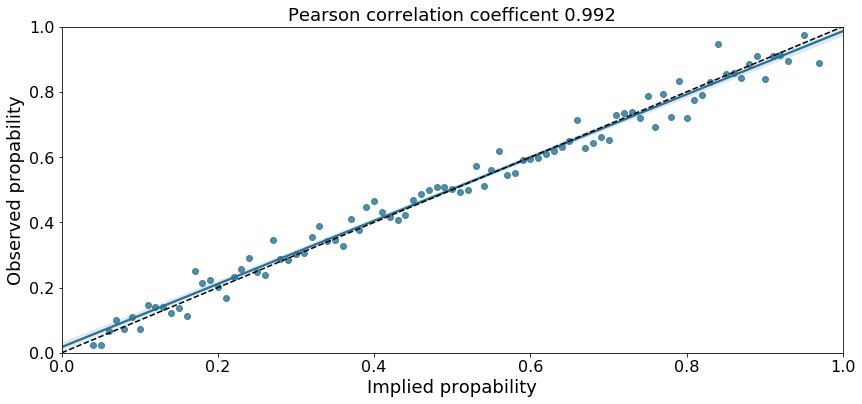

In [24]:
# group implied probabilities
_groupedby_object = df_old.groupby(["Implied probability"])["Bet outcome"].mean()
df_old = pd.DataFrame({'Observed probability': _groupedby_object}).reset_index()
# exclude outliers, data poitns with observed probability of 0 or 1
df_old = df_old[(df_old["Observed probability"]<1) & (df_old["Observed probability"]>0)]

# Calcualte Pearson coerelation cofficient
corr_coeff = df_old["Implied probability"].corr(df_old["Observed probability"]) 

# plot all data
plt.figure(figsize=(14, 6))
ax = sns.regplot(x="Implied probability", y="Observed probability", data=df_old, color="#297192")
ax.plot([0,1], [0,1], "k--")
ax.set_title("Pearson correlation coefficent {:.3f}".format(corr_coeff), fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("Implied propability", fontsize=18)
ax.set_ylabel("Observed propability", fontsize=18)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1);
plt.savefig("images/observed_prob_vs_implied_NBA_13_18_data.png", dpi=200, format="png", bbox_inches="tight");

# 3. Totals market analysis
Totals- total points scored per game by both teams. Let's investigate, whatever some paterns could be found.
## 3.1. Total points scored per game per seasons

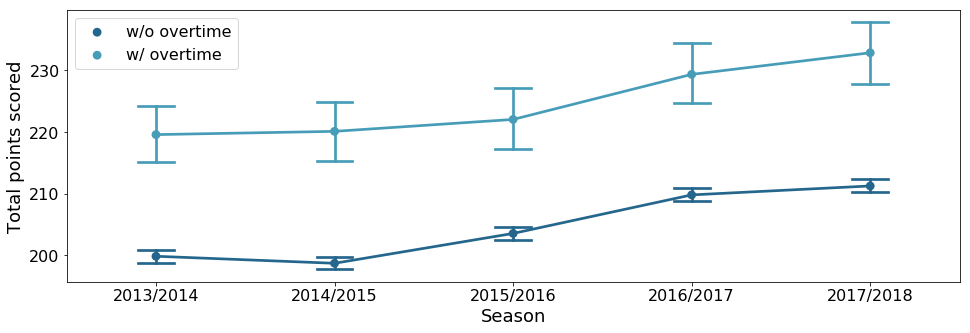

In [25]:
# exclude current season for totals DataFrame
df_totals = df[df.Season != "2018/2019"]
# supress warning
pd.options.mode.chained_assignment = None
# rename overtime column
df_totals["OT"] = df_totals["OT"].map({0: "w/o overtime", 1: "w/ overtime"})
# return to default warnings
pd.options.mode.chained_assignment = 'warn'

# plot all data
f, ax1 = plt.subplots(figsize=(16,5))
sns.catplot(x="Season", y="Total", hue="OT", capsize=.2, palette="YlGnBu_d", height=4, aspect=1.75,
            kind="point", data=df_totals, legend_out = False, ax=ax1)
# rename legend
ax1.legend(loc=2, fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_ylabel("Total points scored", fontsize=18)
ax1.set_xlabel("Season", fontsize=18)
# close dummy plot
plt.close(2)
plt.savefig("images/NBA_total_points_scored.png", dpi=200, format="png", bbox_inches="tight");

## 3.2 Over/under bets
One can observe that average points scored per game increases. This raises a question "whatever markets ajust to this at the begining of the season?"

In [26]:
# conditions
cond_1 = df_bets["Bet type"] == "OU" # take only over/under bets
cond_2 = df_bets["Season"] != "2018/2019" # exclude unfinished season

# create new over/under DataFrame
df_ou = df_bets[cond_1 & cond_2].copy()
# create new collumn which tells whatever bet was on over
df_ou["Bet subtype"] = df_ou["Bet subtype"].apply(lambda x: "Over" if x[:4]=="Over" else "Under")
# fill NAN values with zeros
df_ou = df_ou.fillna(0)
# add month column
df_ou['Month'] = df_ou['Date'].map(lambda x: int(x.month))
# rename Months from numbers to abreviations
df_ou["Month"] = df_ou["Month"].map({1:"Jan", 2:"Feb", 3: "Mar", 4: "Apl", 5: "May", 6: "Jun", 7: "Jul",
                                     8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
# sort bets based on the date
df_ou = df_ou.sort_values(["Date"])

df_ou.head()

,Bet type,Bet subtype,Odds,Net outcome,Total implied probability,URL,Bet outcome,Implied probability,Home_name,Away_name,Date,League,Season,Month
8191,OU,Under,1.99,0.92,1.023346,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.50,Indiana Pacers,Chicago Bulls,2013-10-06 02:00:00,NBA,2013/2014,Oct
8190,OU,Over,1.92,-1.00,1.023346,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.52,Indiana Pacers,Chicago Bulls,2013-10-06 02:00:00,NBA,2013/2014,Oct
8185,OU,Under,1.95,-1.00,1.025641,https://www.oddsportal.com/basketball/usa/nba-...,0.0,0.51,Houston Rockets,New Orleans Pelicans,2013-10-06 03:00:00,NBA,2013/2014,Oct
8184,OU,Over,1.95,0.95,1.025641,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.51,Houston Rockets,New Orleans Pelicans,2013-10-06 03:00:00,NBA,2013/2014,Oct
8178,OU,Over,1.93,0.93,1.023185,https://www.oddsportal.com/basketball/usa/nba-...,1.0,0.52,Los Angeles Lakers,Golden State Warriors,2013-10-06 05:00:00,NBA,2013/2014,Oct


In [27]:
# filter out Under bets, so no duplicates would be present
df_ou_under = df_ou[df_ou["Bet subtype"]=="Under"]
# exclude Spetember, because only 9 games were played in total
df_ou_under = df_ou_under[df_ou.Month!="Sep"]
# bet only on unders, multyply by 100 to get percentages
_returns = df_ou_under.groupby(["League", "Season", "Month"])["Net outcome"].mean()*100
df_ou_under = pd.DataFrame({"Returns": _returns}).reset_index()
df_ou_under.head()

C:\Users\Tomas\PycharmProjects\Interesting_Sport_Stats\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,League,Season,Month,Returns
0,NBA,2013/2014,Apl,-14.039735
1,NBA,2013/2014,Dec,-9.712121
2,NBA,2013/2014,Feb,-1.725146
3,NBA,2013/2014,Jan,5.714286
4,NBA,2013/2014,Jun,21.800000


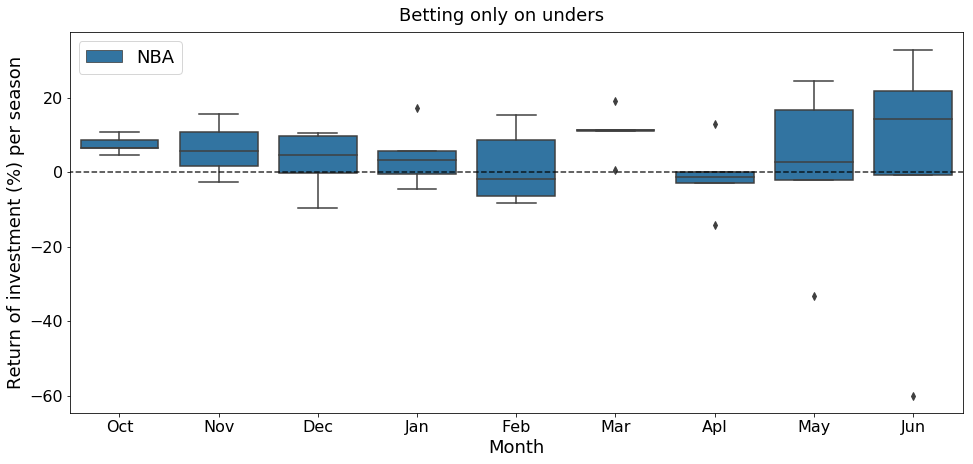

In [28]:
# plot results
f, ax1 = plt.subplots(figsize=(16,7))
f.suptitle('Betting only on unders', y=0.93, fontsize=18)
# exclude semptember because of low amout of data
sns.boxplot(x="Month", y="Returns", hue="League", data=df_ou_under, ax=ax1,
           order=["Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apl", "May", "Jun"])
ax1.plot([-1, 13], [0, 0], "k--", alpha=0.8)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_ylabel("Return of investment (%) per season", fontsize=18)
ax1.set_xlabel("Month", fontsize=18)
ax1.legend(loc=2, fontsize=18);
# Save figure
plt.savefig("images/betting_on_unders_NBA.png", dpi=200, format="png", bbox_inches="tight")

In [29]:
# calculate net returns of blidnly betting in October on unders

cond_1 = df_ou["Bet subtype"] == "Under" # get only over/under markets
cond_2 = df_ou["Month"] == "Oct" # get only October matches
cond_3 = df_ou["League"] == "NBA" # bet only on NBA

units = df_ou[cond_1 & cond_2 & cond_3]["Net outcome"].sum()
ROI = df_ou[cond_1 & cond_2 & cond_3]["Net outcome"].mean()*100
bets_placed = df_ou[cond_1 & cond_2 & cond_3]["Net outcome"].count() 
print("{:.0f} bets placed".format(bets_placed))
print("{:.2f} units won".format(units))
print("{:.2f}% ROI".format(ROI))

657 bets placed
48.44 units won
7.37% ROI


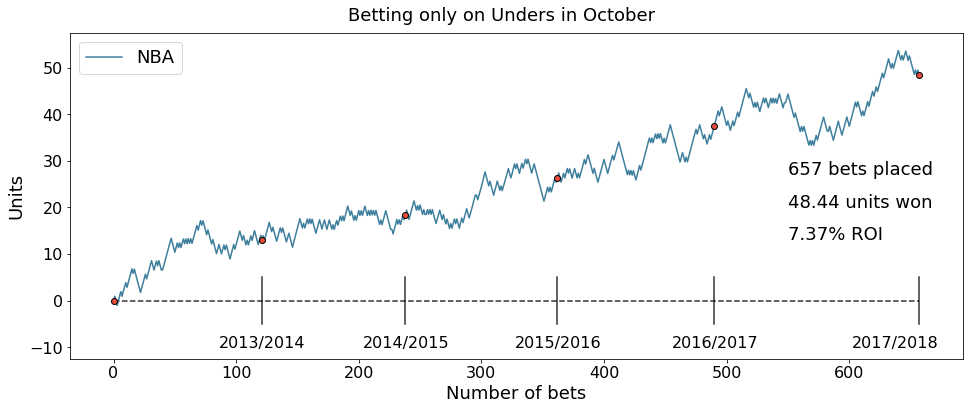

In [30]:
# plot results
f, ax1 = plt.subplots(figsize=(16,6))
f.suptitle('Betting only on Unders in October', y=0.94, fontsize=18)

# get bet numbers
X = pd.Series(np.arange(0, df_ou[cond_1 & cond_2 & cond_3].shape[0]+1)).values
# get cummunitative sum for bets
Y = df_ou[cond_1 & cond_2 & cond_3]["Net outcome"].cumsum().values
Y = np.append([0], Y)
# baseline
ax1.plot([0, 657], [0, 0], "k--", alpha=0.8)
ax1.plot(Y, label="NBA", color="#297192", alpha=0.9)
# manually add ticks where season ended (for text substract 35 from x position)
ax1.plot([121, 121], [5, -5], "k-", alpha=0.8)
ax1.text(86, -10, "2013/2014", fontsize=16)
ax1.plot([238, 238], [5, -5], "k-", alpha=0.8)
ax1.text(203, -10, "2014/2015", fontsize=16)
ax1.plot([362, 362], [5, -5], "k-", alpha=0.8)
ax1.text(327, -10, "2015/2016", fontsize=16)
ax1.plot([490, 490], [5, -5], "k-", alpha=0.8)
ax1.text(455, -10, "2016/2017", fontsize=16)
ax1.plot([657, 657], [5, -5], "k-", alpha=0.8)
ax1.text(602, -10, "2017/2018", fontsize=16)
# manually show unit change over seasons
ax1.scatter([0, 121, 238, 362, 490, 657], [0, 13, 18.36, 26.35, 37.5, 48.44],
            color="#e74c3c", edgecolors='k', zorder=10)

ax1.text(550, 27, "{:.0f} bets placed".format(bets_placed), fontsize=18)
ax1.text(550, 20, "{:.2f} units won".format(units), fontsize=18)
ax1.text(550, 13, "{:.2f}% ROI".format(ROI), fontsize=18)

ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_ylabel("Units", fontsize=18)
ax1.set_xlabel("Number of bets", fontsize=18);
ax1.set_ylim(-12.5, 57.5)
ax1.legend(loc=2, fontsize=18);
# Save figure
plt.savefig("images/NBA_under_bets_ver_2.png", dpi=200, format="png", bbox_inches="tight")

### 3.2.2 Current season unders performance

In [31]:
# conditions
cond_1 = df_bets["Bet type"] == "OU" # take only over/under bets
cond_2 = df_bets["Season"] == "2018/2019" # check unfinished season
# make new DataFrame
df_ou_now = df_bets[cond_1 & cond_2].copy()

# create new collumn which tells whatever bet was on over
df_ou_now["Bet subtype"] = df_ou_now["Bet subtype"].apply(lambda x: "Over" if x[:4]=="Over" else "Under")
# add month column
df_ou_now['Month'] = df_ou_now['Date'].map(lambda x: int(x.month))

cond_1 = df_ou_now["Bet subtype"] == "Under" # get only over/under markets
cond_2 = df_ou_now["Month"] == 10 # get only October matches
cond_3 = df_ou_now["League"] == "NBA" # bet only on NBA

units = df_ou_now[cond_1 & cond_2 & cond_3]["Net outcome"].sum()
ROI = df_ou_now[cond_1 & cond_2 & cond_3]["Net outcome"].mean()*100
bets_placed = df_ou_now[cond_1 & cond_2 & cond_3]["Net outcome"].count() 
print("{:.0f} bets placed".format(bets_placed))
print("{:.2f} units won".format(units))
print("{:.2f}% ROI".format(ROI))

158 bets placed
-11.03 units won
-6.98% ROI


# 4. Team fans
Investigate which team fans won or lost most money over last 5 NBA seaons.
## 4.1 Head to head (H2H) bets

In [32]:
%%time
# copy only head to head bets
df_H2H = df_bets[(df_bets["Bet type"]=="H2H")].copy().reindex()

_results = list()
# iterate over unique match links
for url in df_H2H.URL.unique():
    # take only H2H data for particular match
    _data = df_H2H[df_H2H.URL == url].reindex()
    # home team outcome
    _home = _data.iloc[0]
    _results.append([_home["Home_name"], _home["Bet subtype"], _home["URL"], _home["Net outcome"],
                    _home["League"], _home["Season"], _home["Odds"], _home["Date"]])
    # away team outcome
    _away = _data.iloc[1]
    _results.append([_away["Away_name"], _away["Bet subtype"], _away["URL"], _away["Net outcome"],
                    _away["League"], _away["Season"], _away["Odds"], _away["Date"]])
    
# save it to new DataFrame
df_H2H = pd.DataFrame(_results, columns=["Team name", "Bet subtype", "URL", "Net outcome",
                                      "League", "Season", "Odds", "Date"])

Wall time: 29.2 s


In [33]:
# sort bets based on the date
df_H2H = df_H2H.sort_values(["Date"])
df_H2H.head()

,Team name,Bet subtype,URL,Net outcome,League,Season,Odds,Date
2851,Chicago Bulls,Away,https://www.oddsportal.com/basketball/usa/nba-...,2.20,NBA,2013/2014,3.20,2013-10-06 02:00:00
2850,Indiana Pacers,Home,https://www.oddsportal.com/basketball/usa/nba-...,-1.00,NBA,2013/2014,1.51,2013-10-06 02:00:00
2849,New Orleans Pelicans,Away,https://www.oddsportal.com/basketball/usa/nba-...,3.33,NBA,2013/2014,4.33,2013-10-06 03:00:00
2848,Houston Rockets,Home,https://www.oddsportal.com/basketball/usa/nba-...,-1.00,NBA,2013/2014,1.33,2013-10-06 03:00:00
2846,Los Angeles Lakers,Home,https://www.oddsportal.com/basketball/usa/nba-...,3.05,NBA,2013/2014,4.05,2013-10-06 05:00:00


In [34]:
print("Median odds")
print("Home team: {}".format(df_H2H[df_H2H["Bet subtype"]=="Home"]["Odds"].median()))
print("Away team: {}".format(df_H2H[df_H2H["Bet subtype"]=="Away"]["Odds"].median()))

Median odds
Home team: 1.65
Away team: 2.55


In [35]:
_returns = df_H2H.groupby(["Team name", "Season"])["Net outcome"].sum()
df_H2H_returns = pd.DataFrame({"Season returns": _returns}).reset_index()
# get only team names which aprticipated in all 6 seasons, this exclude games for fun
team_names = df_H2H_returns["Team name"].value_counts()[df_H2H_returns["Team name"].value_counts()==6].index
df_H2H_returns = df_H2H_returns[df_H2H_returns['Team name'].isin(team_names)]
df_H2H_returns.head()

,Team name,Season,Season returns
0,Atlanta Hawks,2013/2014,-8.43
1,Atlanta Hawks,2014/2015,15.58
2,Atlanta Hawks,2015/2016,-6.49
3,Atlanta Hawks,2016/2017,17.37
4,Atlanta Hawks,2017/2018,3.29


In [36]:
# exclude current season
_group = df_H2H_returns[df_H2H_returns.Season!="2018/2019"].groupby(["Team name"])["Season returns"].agg({'sum':'sum',
                                                                                    'mean':'mean',
                                                                                    'std':'std'}) 
# _group.sort_values(['sum', 'mean', 'std'], ascending=[False, False, True])
_group.sort_values(['sum'], ascending=[True])

C:\Users\Tomas\PycharmProjects\Interesting_Sport_Stats\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,sum,mean,std
Team name,,,
Philadelphia 76ers,-55.09,-11.018,23.959844
Milwaukee Bucks,-48.01,-9.602,21.142906
Orlando Magic,-34.61,-6.922,7.944795
Minnesota Timberwolves,-30.41,-6.082,14.400995
Detroit Pistons,-20.40,-4.080,8.668994
Oklahoma City Thunder,-18.99,-3.798,6.382983
Dallas Mavericks,-10.79,-2.158,10.013008
New York Knicks,-5.73,-1.146,8.441332
Cleveland Cavaliers,-2.38,-0.476,11.498893


In [37]:
# current season
_group = df_H2H_returns[df_H2H_returns.Season=="2018/2019"].groupby(["Team name"])["Season returns"].agg({'sum':'sum'}) 
# _group.sort_values(['sum', 'mean', 'std'], ascending=[False, False, True])
_group.sort_values(['sum'], ascending=[False])

C:\Users\Tomas\PycharmProjects\Interesting_Sport_Stats\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,sum
Team name,
Memphis Grizzlies,13.02
Sacramento Kings,12.80
Orlando Magic,8.10
Los Angeles Clippers,8.07
Toronto Raptors,5.88
Milwaukee Bucks,5.80
New York Knicks,5.03
Oklahoma City Thunder,3.69
Portland Trail Blazers,3.47


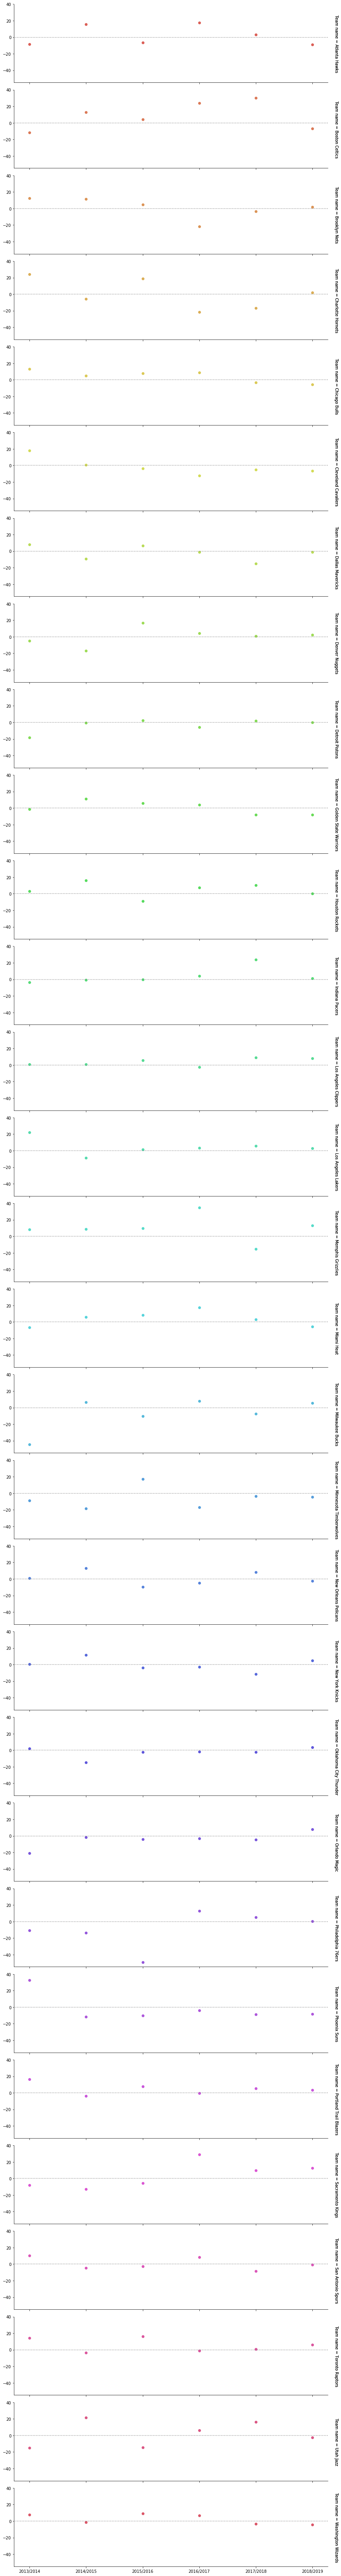

In [38]:
g = sns.FacetGrid(df_H2H_returns, row="Team name", hue="Team name",
                  margin_titles=True, height=3, aspect=4, palette="hls")
g.map(plt.scatter, "Season", "Season returns");
# Draw a horizontal line to show 0 sum
g.map(plt.axhline, y=0, ls=":", c=".5");

In [39]:
# create new dataframe, which shows 
df_H2H_teams = pd.DataFrame({'sum' : df_H2H.groupby(["Season", "Team name", "Bet subtype"])["Net outcome"].sum()}).reset_index()
# exclude team names which had low amount of games, e.g. east or west
df_H2H_teams = df_H2H_teams[df_H2H_teams['Team name'].isin(team_names)]
df_H2H_teams.head()

,Season,Team name,Bet subtype,sum
0,2013/2014,Atlanta Hawks,Away,-6.52
1,2013/2014,Atlanta Hawks,Home,-1.91
2,2013/2014,Boston Celtics,Away,-3.99
3,2013/2014,Boston Celtics,Home,-7.49
4,2013/2014,Brooklyn Nets,Away,5.66


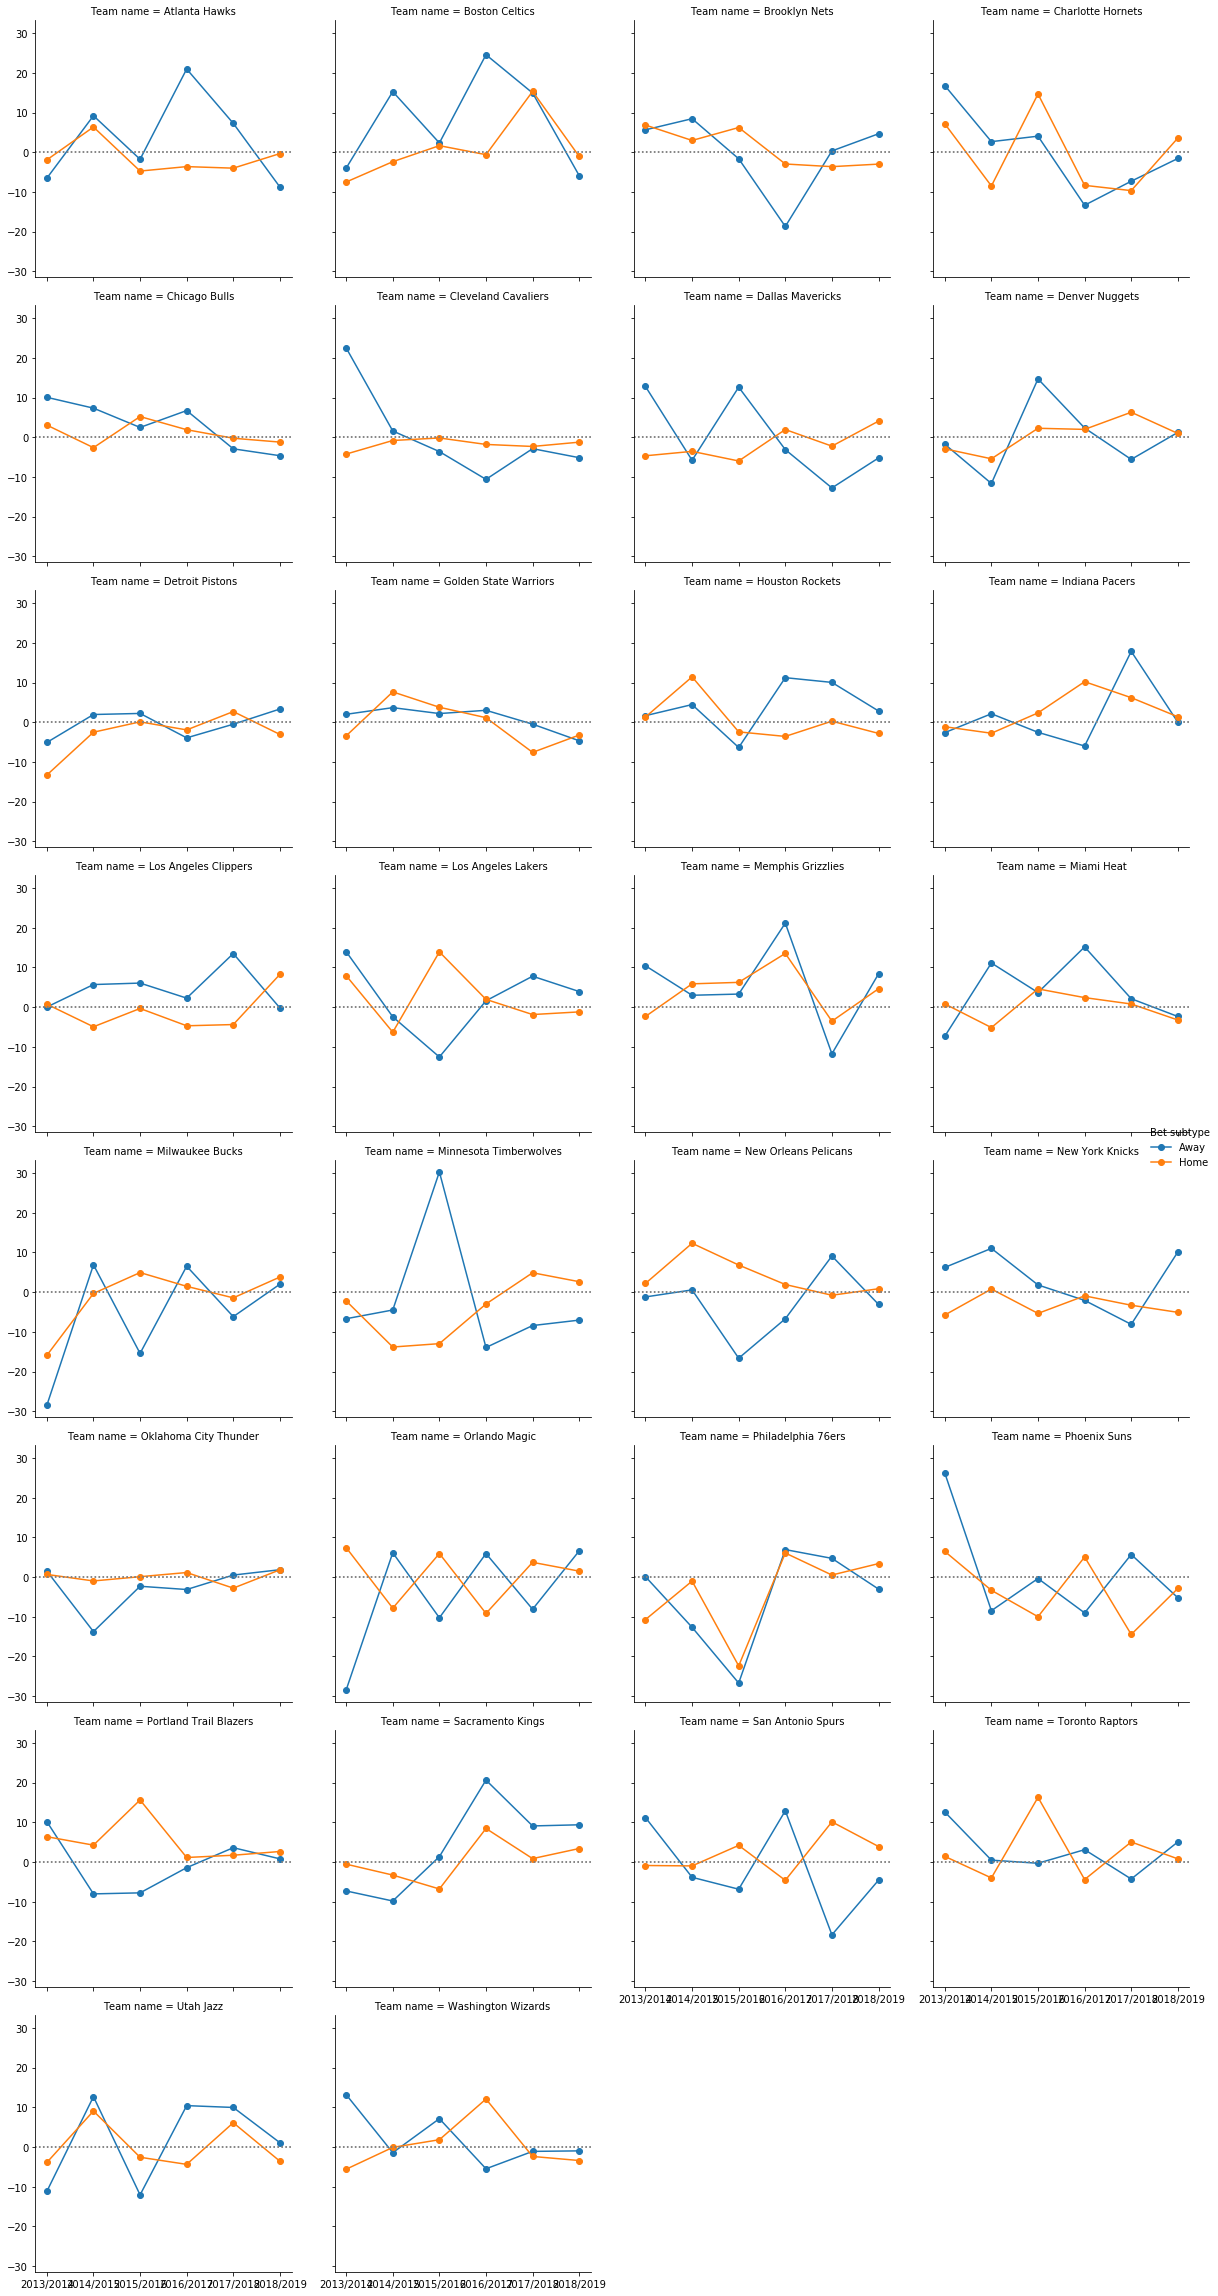

In [40]:
grid = sns.FacetGrid(df_H2H_teams, hue="Bet subtype", col="Team name", col_wrap=4, height=4)
grid.map(plt.plot, "Season", "sum", marker="o").add_legend();
# Draw a horizontal line to show 0 returns
grid.map(plt.axhline, y=0, ls=":", c=".5");

## 4.2 Asian handicap (AH)

In [41]:
%%time
# copy only asian handicap bets
df_AH = df_bets[df_bets["Bet type"]=="AH"].copy().reindex()

_results = list()
# iterate over unique match links
for url in df_AH.URL.unique():
    # take only H2H data for particular match
    _data = df_AH[df_AH.URL == url].reindex()
    # home team outcome
    _home = _data.iloc[0]
    _results.append([_home["Home_name"], _home["Bet subtype"][:4], _home["URL"], _home["Net outcome"],
                    _home["League"], _home["Season"], _home["Odds"], _home["Date"]])
    # away team outcome
    _away = _data.iloc[1]
    _results.append([_away["Away_name"], _away["Bet subtype"][:4], _away["URL"], _away["Net outcome"],
                    _away["League"], _away["Season"], _away["Odds"], _away["Date"]])
    
# save it to new DataFrame
df_AH = pd.DataFrame(_results, columns=["Team name", "Bet subtype", "URL",
                                        "Net outcome", "League", "Season", "Odds", "Date"])

Wall time: 27 s


In [42]:
# sort bets based on the date
df_AH = df_AH.sort_values(["Date"])
df_AH.head()

,Team name,Bet subtype,URL,Net outcome,League,Season,Odds,Date
2669,Chicago Bulls,Away,https://www.oddsportal.com/basketball/usa/nba-...,1.00,NBA,2013/2014,2.00,2013-10-06 02:00:00
2668,Indiana Pacers,Home,https://www.oddsportal.com/basketball/usa/nba-...,-1.00,NBA,2013/2014,1.91,2013-10-06 02:00:00
2667,New Orleans Pelicans,Away,https://www.oddsportal.com/basketball/usa/nba-...,0.92,NBA,2013/2014,1.92,2013-10-06 03:00:00
2666,Houston Rockets,Home,https://www.oddsportal.com/basketball/usa/nba-...,-1.00,NBA,2013/2014,2.02,2013-10-06 03:00:00
2664,Los Angeles Lakers,Home,https://www.oddsportal.com/basketball/usa/nba-...,0.91,NBA,2013/2014,1.91,2013-10-06 05:00:00


In [43]:
# mean odds
df_AH["Odds"].median()

1.99

In [44]:
print("Median odds")
print("Home team: {}".format(df_AH[df_AH["Bet subtype"]=="Home"]["Odds"].median()))
print("Away team: {}".format(df_AH[df_AH["Bet subtype"]=="Away"]["Odds"].median()))

Median odds
Home team: 1.99
Away team: 1.99


In [45]:
_returns = df_AH.groupby(["League", "Team name", "Season"])["Net outcome"].sum()
df_AH_returns = pd.DataFrame({"Season returns": _returns}).reset_index()
# get only team names which aprticipated in all 5 seasons
df_AH_returns = df_AH_returns[df_AH_returns['Team name'].isin(team_names)]
df_AH_returns.head()

,League,Team name,Season,Season returns
0,NBA,Atlanta Hawks,2013/2014,-6.98
1,NBA,Atlanta Hawks,2014/2015,16.91
2,NBA,Atlanta Hawks,2015/2016,5.68
3,NBA,Atlanta Hawks,2016/2017,-5.26
4,NBA,Atlanta Hawks,2017/2018,1.91


In [46]:
# exclude current season
_group = df_AH_returns[df_AH_returns.Season!="2018/2019"].groupby(["Team name"])["Season returns"].agg({'sum':'sum',
                                                                                      'mean':'mean',
                                                                                      'std':'std'}) 
_group.sort_values(['sum', 'mean', 'std'], ascending=[False, False, True])
# _group.sort_values(['std'], ascending=[True])

C:\Users\Tomas\PycharmProjects\Interesting_Sport_Stats\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,sum,mean,std
Team name,,,
Toronto Raptors,39.41,7.882,6.740239
San Antonio Spurs,38.48,7.696,2.741583
Golden State Warriors,38.21,7.642,11.540818
Boston Celtics,35.98,7.196,10.113443
Portland Trail Blazers,24.42,4.884,5.854526
Houston Rockets,23.66,4.732,10.386093
Indiana Pacers,19.41,3.882,9.881213
Miami Heat,14.57,2.914,9.880497
Atlanta Hawks,12.26,2.452,9.594075


In [47]:
# exclude current season
_group = df_AH_returns[df_AH_returns.Season=="2018/2019"].groupby(["Team name"])["Season returns"].agg({'sum':'sum'}) 
_group.sort_values(['sum'], ascending=[False])

C:\Users\Tomas\PycharmProjects\Interesting_Sport_Stats\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,sum
Team name,
Charlotte Hornets,9.69
Milwaukee Bucks,8.87
Portland Trail Blazers,8.17
Oklahoma City Thunder,5.89
Sacramento Kings,5.25
Dallas Mavericks,4.71
Toronto Raptors,4.14
Orlando Magic,4.10
Memphis Grizzlies,3.81


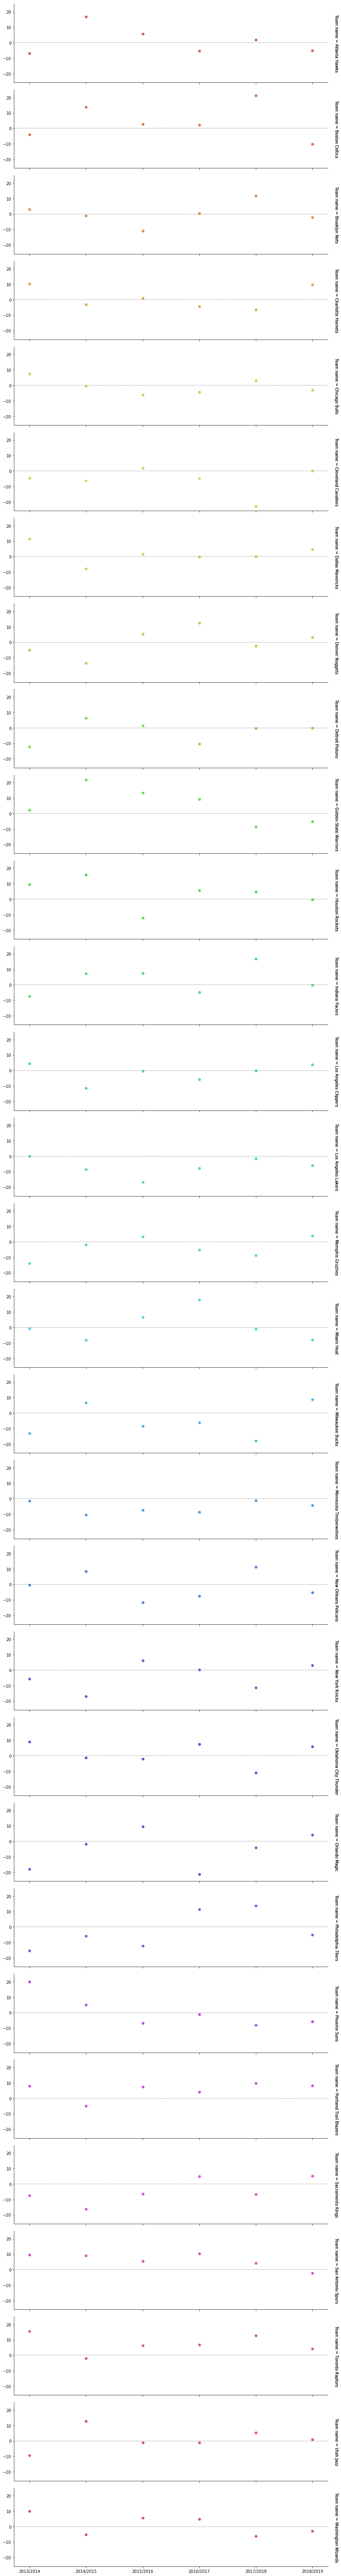

In [48]:
g = sns.FacetGrid(df_AH_returns, row="Team name", hue="Team name",
                  margin_titles=True, height=3, aspect=4, palette="hls")
g.map(plt.scatter, "Season", "Season returns");
# Draw a horizontal line to show 0 sum
g.map(plt.axhline, y=0, ls=":", c=".5");

In [49]:
# create new dataframe, which shows 
df_AH_teams = pd.DataFrame({'sum' : df_AH.groupby(["Season", "Team name", "Bet subtype"])["Net outcome"].sum()}).reset_index()
# exclude team names which had low amount of games, e.g. east or west
df_AH_teams = df_AH_teams[df_AH_teams['Team name'].isin(team_names)]
df_AH_teams.head()

,Season,Team name,Bet subtype,sum
0,2013/2014,Atlanta Hawks,Away,-6.50
1,2013/2014,Atlanta Hawks,Home,-0.48
2,2013/2014,Boston Celtics,Away,1.44
3,2013/2014,Boston Celtics,Home,-5.32
4,2013/2014,Brooklyn Nets,Away,-1.29


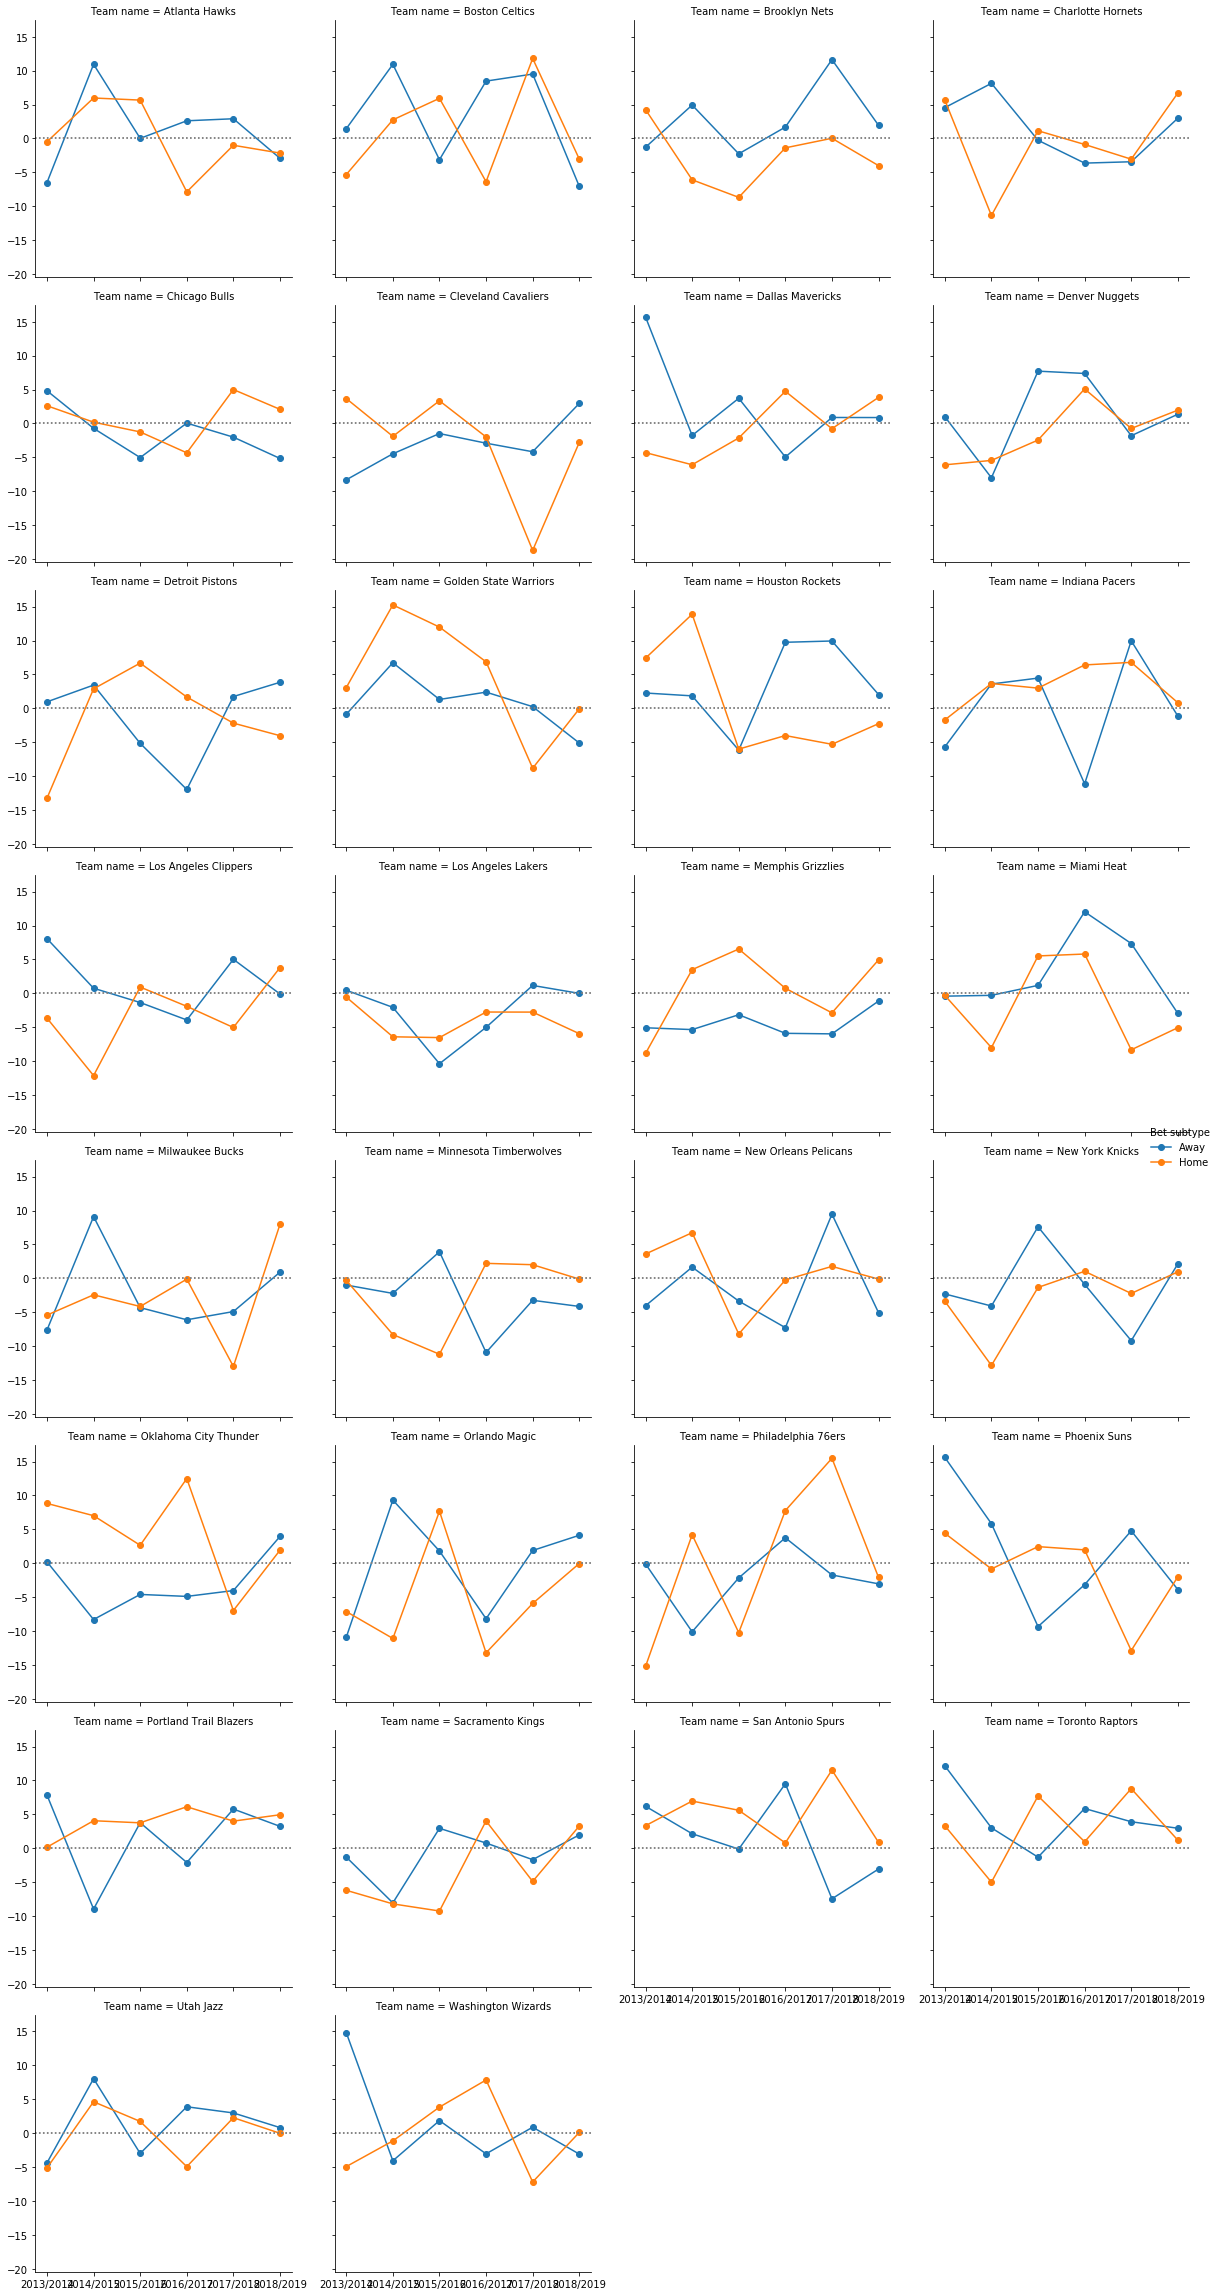

In [50]:
grid = sns.FacetGrid(df_AH_teams, hue="Bet subtype", col="Team name", col_wrap=4, height=4)
grid.map(plt.plot, "Season", "sum", marker="o").add_legend();
# Draw a horizontal line to show 0 returns
grid.map(plt.axhline, y=0, ls=":", c=".5");

## 4.3 Spesific teams

### 4.3.1 Home court advantage
Portland Trail Blazers

In [51]:
# describe filters
cond_1 = df_AH["Team name"]=="Portland Trail Blazers" # team name
cond_2 = df_AH["Bet subtype"]=='Home' # Playing at home
cond_3 = df_AH["Season"]!='2018/2019' # Exclude current season
df_port_AH = df_AH[cond_1 & cond_2 & cond_3].reset_index(drop=True)

cond_1 = df_H2H["Team name"]=="Portland Trail Blazers" # team name
cond_2 = df_H2H["Bet subtype"]=='Home' # Playing at home
cond_3 = df_H2H["Season"]!='2018/2019' # Exclude current season
df_port_H2H = df_H2H[cond_1 & cond_2].reset_index(drop=True)

df_port_AH["AH returns"] = df_port_AH["Net outcome"].cumsum()
df_port_AH["H2H returns"] = df_port_H2H["Net outcome"].cumsum()
df_port_AH.head()

,Team name,Bet subtype,URL,Net outcome,League,Season,Odds,Date,AH returns,H2H returns
0,Portland Trail Blazers,Home,https://www.oddsportal.com/basketball/usa/nba-...,-1.00,NBA,2013/2014,2.00,2013-10-08 05:00:00,-1.00,-1.00
1,Portland Trail Blazers,Home,https://www.oddsportal.com/basketball/usa/nba-...,-1.00,NBA,2013/2014,1.99,2013-10-10 05:00:00,-2.00,-2.00
2,Portland Trail Blazers,Home,https://www.oddsportal.com/basketball/usa/nba-...,1.00,NBA,2013/2014,2.00,2013-10-12 04:00:00,-1.00,-0.84
3,Portland Trail Blazers,Home,https://www.oddsportal.com/basketball/usa/nba-...,0.91,NBA,2013/2014,1.91,2013-10-21 04:00:00,-0.09,-0.07
4,Portland Trail Blazers,Home,https://www.oddsportal.com/basketball/usa/nba-...,0.99,NBA,2013/2014,1.99,2013-11-03 04:00:00,0.90,1.13


In [52]:
df_port_AH.groupby("Season")["AH returns"].count()

Season
2013/2014    46
2014/2015    44
2015/2016    44
2016/2017    41
2017/2018    44
Name: AH returns, dtype: int64

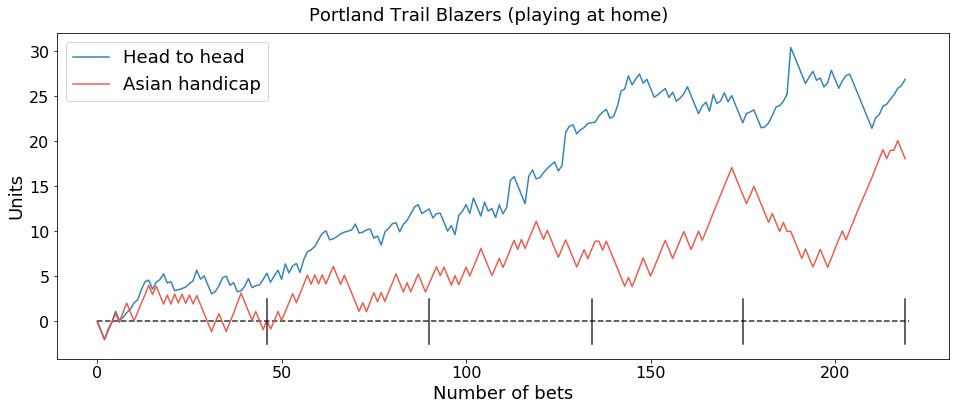

In [53]:
# plot results
f, ax1 = plt.subplots(figsize=(16,6))
f.suptitle('Portland Trail Blazers (playing at home)', y=0.94, fontsize=18)

# get bet numbers
X = pd.Series(np.arange(0, df_port_AH.shape[0]+1)).values
# get AH bets
Y1 = df_port_AH["AH returns"].values
Y1 = np.append([0], Y1)
# get H2H bets
Y2 = df_port_AH["H2H returns"].values
Y2 = np.append([0], Y2)
# baseline
ax1.plot([0, X.shape[0]], [0, 0], "k--", alpha=0.8)
ax1.plot(X, Y2, label="Head to head", alpha=0.9)
ax1.plot(X, Y1, label="Asian handicap", color="#e74c3c", alpha=0.9)


# manually place ticks for seasons
ax1.plot([46, 46], [2.5, -2.5], "k-", alpha=0.8)
ax1.plot([90, 90], [2.5, -2.5], "k-", alpha=0.8)
ax1.plot([134, 134], [2.5, -2.5], "k-", alpha=0.8)
ax1.plot([175, 175], [2.5, -2.5], "k-", alpha=0.8)
ax1.plot([219, 219], [2.5, -2.5], "k-", alpha=0.8)

ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_ylabel("Units", fontsize=18)
ax1.set_xlabel("Number of bets", fontsize=18);
# ax1.set_ylim(-12.5, 57.5)
ax1.legend(loc=2, fontsize=18);
# Save figure
plt.savefig("images/portland_home_court_strategy.png", dpi=200, format="png", bbox_inches="tight")

In [54]:
pd.concat([df_detailed, pd.read_csv("data/"+fname, index_col=0)], ignore_index=True)

C:\Users\Tomas\PycharmProjects\Interesting_Sport_Stats\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,AH,AH_Away,AH_Home,Away_name,Date,Home_name,Month,OU,Over,URL,Under
0,-5.5,2.00,2.02,Miami Heat,2014-06-16 03:00:00,San Antonio Spurs,6.0,196.5,2.10,https://www.oddsportal.com/basketball/usa/nba-...,1.91
1,-5,2.00,2.12,San Antonio Spurs,2014-06-13 04:00:00,Miami Heat,6.0,196,1.97,https://www.oddsportal.com/basketball/usa/nba-...,2.03
2,-4.5,2.06,1.99,San Antonio Spurs,2014-06-11 04:00:00,Miami Heat,6.0,197,1.98,https://www.oddsportal.com/basketball/usa/nba-...,1.97
3,-4.5,2.04,1.97,Miami Heat,2014-06-09 03:00:00,San Antonio Spurs,6.0,198.5,2.02,https://www.oddsportal.com/basketball/usa/nba-...,1.98
4,-5.5,1.98,2.02,Miami Heat,2014-06-06 04:00:00,San Antonio Spurs,6.0,198.5,2.04,https://www.oddsportal.com/basketball/usa/nba-...,1.98
5,-3.5,2.03,1.95,San Antonio Spurs,2014-06-01 03:30:00,Oklahoma City Thunder,6.0,206.5,2.02,https://www.oddsportal.com/basketball/usa/nba-...,1.97
6,-8,1.98,2.12,Indiana Pacers,2014-05-31 03:30:00,Miami Heat,5.0,182.5,1.95,https://www.oddsportal.com/basketball/usa/nba-...,2.03
7,-5,1.95,2.06,Oklahoma City Thunder,2014-05-30 04:00:00,San Antonio Spurs,5.0,206.5,2.02,https://www.oddsportal.com/basketball/usa/nba-...,1.95
8,1,1.91,2.14,Miami Heat,2014-05-29 03:30:00,Indiana Pacers,5.0,183.5,2.02,https://www.oddsportal.com/basketball/usa/nba-...,1.99
9,-2.5,2.10,1.95,San Antonio Spurs,2014-05-28 04:00:00,Oklahoma City Thunder,5.0,207.5,2.04,https://www.oddsportal.com/basketball/usa/nba-...,1.94
